# **Machine Learning para Business Intelligence** 
#### Profesor: Lucas Gómez Tobón

## Taller sobre Regularización

1. Defina su directorio como la carpeta de "Datos" de la clase.

    Hint: Le recomendamos usar la librería `os`.

In [28]:
import os
os.chdir("../Data/")

2. Importe el archivo `communities.data` utilizando la función [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

    Hint: No se le olvide importar la librería `pandas` para poder usar esta función.

In [29]:
import pandas as pd
df = pd.read_csv('communities.data')

2.1. Importe el archivo `attributes.csv`. Este CSV contiene los nombres de las variables

In [30]:
nombres = pd.read_csv("attributes.csv")
nombres

,attributes
0,state
1,county
2,community
3,communityname
4,fold
...,...
123,LemasPctPolicOnPatr
124,LemasGangUnitDeploy
125,LemasPctOfficDrugUn
126,PolicBudgPerPop


2.2. Utilice la columna `attributes` del data frame con los nombres de las variables para renombrar la columnas de la base de `communities.data`.

    Hint: Le recomendamos usar el atributo `.columns` de la base principal.

In [31]:
df.columns = nombres.attributes.values

3. Inspeccione los datos importados. Algunas preguntas que pueden ayudar a guiar su trabajo son: ¿Cuántas observaciones tiene? ¿Cuántas variables tiene? ¿Cómo se ven las primeras filas de su data frame? ¿Tiene valores faltantes (`NA`s)?.

    Algunos métodos que le pueden resultar de utilidad para responder estas preguntas son: `.shape`, `.info()`, `.columns`, `.head()`.

In [32]:
df.shape

(1993, 128)

In [33]:
df.columns

Index(['state  ', 'county  ', 'community  ', 'communityname', 'fold  ',
       'population  ', 'householdsize  ', 'racepctblack  ', 'racePctWhite  ',
       'racePctAsian  ',
       ...
       'LandArea  ', 'PopDens  ', 'PctUsePubTrans  ', 'PolicCars  ',
       'PolicOperBudg  ', 'LemasPctPolicOnPatr  ', 'LemasGangUnitDeploy  ',
       'LemasPctOfficDrugUn  ', 'PolicBudgPerPop  ', 'ViolentCrimesPerPop  '],
      dtype='object', length=128)

In [34]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 128 columns):
 #    Column                   Dtype  
---   ------                   -----  
 0    state                    int64  
 1    county                   object 
 2    community                object 
 3    communityname            object 
 4    fold                     int64  
 5    population               float64
 6    householdsize            float64
 7    racepctblack             float64
 8    racePctWhite             float64
 9    racePctAsian             float64
 10   racePctHisp              float64
 11   agePct12t21              float64
 12   agePct12t29              float64
 13   agePct16t24              float64
 14   agePct65up               float64
 15   numbUrban                float64
 16   pctUrban                 float64
 17   medIncome                float64
 18   pctWWage                 float64
 19   pctWFarmSelf             float64
 20   pctWInvInc               flo

In [35]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.0,?,0.67
1,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.0,?,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.0,?,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.0,?,0.03
4,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.0,?,0.14


In [36]:
df.isna().sum().sum()

0

4. Revise el diccionario de la base de datos [aquí](http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). Note que los datos corresponden a información socioeconómica de diferentes comunidades de EE.UU. extraída del Censo de 1990 y otras variables relacionadas con el cumplimiento de la ley y criminalidad. 

    ¿Qué dice el diccionario sobre los valores faltantes (`NA`s)?

5. Reemplace todos los `?` por `NA`. Le recomendamos usar la función [.replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) de `pandas`. Adicionalmente note que escribir "NA" para describir un valor faltante no es correcto porque Python va a interpretar la entrada como un string (texto) y no como un vacío. Le recomendamos reemplazar "?" con `np.nan` del paquete `numpy`. 

In [37]:
import numpy as np

df = df.replace({"?": np.nan})
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.0,NaN,0.67
1,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.43
2,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.0,NaN,0.12
3,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.0,NaN,0.03
4,6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.0,NaN,0.14


In [38]:
df.isna().sum().sum()

39200

6. Corra las siguientes líneas de código para visualizar los valores faltantes en su base de datos.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

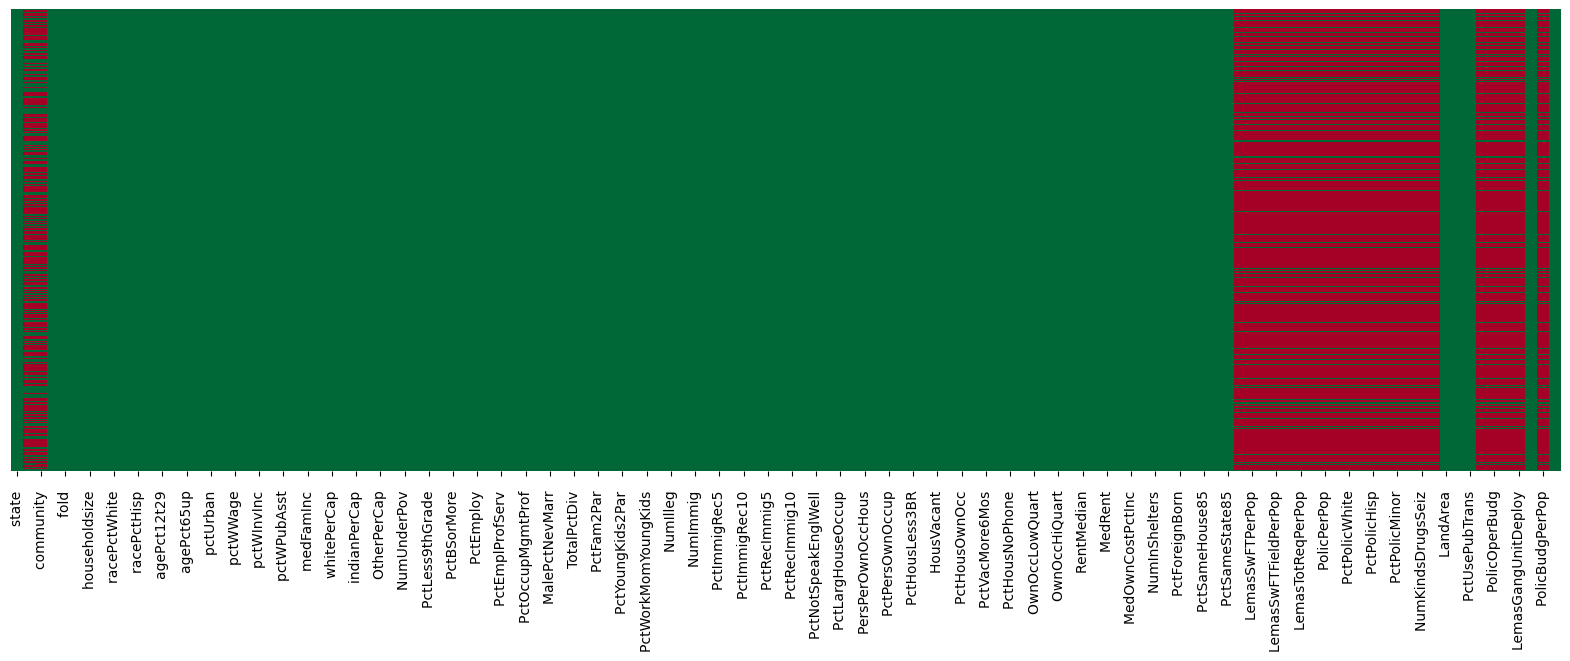

In [40]:
# El dataframe en mi ambiente se llama df, si usted le puso otro nombre, cambiar el df de la línea 4 de esta celda 
# el nombre que le haya puesto a la base

plt.figure(figsize = (20, 6))
# Rojo es NA y verde es celda completa :)
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "RdYlGn_r")

7. Elimine todas las **columnas** que tengan `NA`. ¿Cuántas columnas eliminó?

    Hint: Utilice el método `.dropna()` de `pandas`

In [41]:
ncol_inicial = df.shape[1]
df = df.dropna(axis = 1)
ncol_final = df.shape[1]
print("Se eliminaron {} columnas".format(ncol_inicial - ncol_final))

Se eliminaron 25 columnas


8. Los nombres de las variables tienen espacios y mayúsculas. Corra la siguiente línea para homogenizar los nombres.

In [42]:
# Antes
nombres = df.columns
nombres

Index(['state  ', 'communityname', 'fold  ', 'population  ', 'householdsize  ',
       'racepctblack  ', 'racePctWhite  ', 'racePctAsian  ', 'racePctHisp  ',
       'agePct12t21  ',
       ...
       'PctForeignBorn  ', 'PctBornSameState  ', 'PctSameHouse85  ',
       'PctSameCity85  ', 'PctSameState85  ', 'LandArea  ', 'PopDens  ',
       'PctUsePubTrans  ', 'LemasPctOfficDrugUn  ', 'ViolentCrimesPerPop  '],
      dtype='object', length=103)

In [43]:
# Después
nombres = nombres.str.strip().str.lower()
df.columns = nombres
nombres

Index(['state', 'communityname', 'fold', 'population', 'householdsize',
       'racepctblack', 'racepctwhite', 'racepctasian', 'racepcthisp',
       'agepct12t21',
       ...
       'pctforeignborn', 'pctbornsamestate', 'pctsamehouse85', 'pctsamecity85',
       'pctsamestate85', 'landarea', 'popdens', 'pctusepubtrans',
       'lemaspctofficdrugun', 'violentcrimesperpop'],
      dtype='object', length=103)

9. Divida su base de datos en `X` e `y` en donde `y` sea la columna `violentcrimesperpop`.

In [44]:
X = df.drop("violentcrimesperpop", axis = 1)
y = df["violentcrimesperpop"]

10. Elimine la columna `communityname` de `X`.

In [45]:
X = X.drop("communityname", axis = 1)

10. Divida su base de datos en dos: train y test. Utilice como semilla: `random_state = 1` y deje el 70% de sus datos para entrenamiento y 30% para prueba.

Hint: Utilice la función [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de `sklearn`.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

11. Entrene una regresión lineal.

Hint: Utilice la función [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de `sklearn`.

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

12. Construya la predicción del modelo *dentro de muestra* y *fuera de muestra*.

In [48]:
y_hat_in1 = linreg.predict(X_train)
y_hat_out1 = linreg.predict(X_test)

13. Calcule el error dentro y fuera de muestra utilizando el `MAE`, `MAPE` y `RMSE`.

Hint: Recuerde utilizar las funciones `mean_absolute_error`, `mean_absolute_percentage_error`, `mean_squared_error` de `sklearn`

In [49]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae_in1 = mean_absolute_error(y_train, y_hat_in1) 
mape_in1 = mean_absolute_percentage_error(y_train, y_hat_in1) 
rmse_in1 = mean_squared_error(y_train, y_hat_in1, squared = False) 

In [50]:
mae_out1 = mean_absolute_error(y_test, y_hat_out1) 
mape_out1 = mean_absolute_percentage_error(y_test, y_hat_out1) 
rmse_out1 = mean_squared_error(y_test, y_hat_out1, squared = False) 

14. Cree un Data Frame de resultados donde guarde las métricas de este modelo.

In [51]:
resultados = pd.DataFrame({"Modelo": ["Regresión lineal", "Regresión lineal"],
                           "Muestra": ["Train", "Test"],
                           "MAE": [mae_in1, mae_out1],
                           "MAPE": [mape_in1, mape_out1],
                           "RMSE": [rmse_in1, rmse_out1]})

In [52]:
resultados

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión lineal,Train,0.089931,8.785992e+11,0.125675
1,Regresión lineal,Test,0.100910,4.263053e+12,0.142951


15. Estandarice `X_train` y `X_test`.

Hint: Recuerde que puede usar la función `StandarScaler()` de `sklearn`

In [53]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

16. Entrene una regresión Ridge y encuentre el mejor valor del parámetro de regularización `alpha`.

    Hint: Recuerde que puede usar la función `RidgeCV` de `sklearn`.

In [61]:
from sklearn.linear_model import RidgeCV

# Lo más importante es definir un intervalo de alpha adecuado
alpha_range = np.linspace(2, 1300, 1000)
ridge = RidgeCV(alphas = alpha_range, cv = 10)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([   2.        ,    3.2992993 ,    4.5985986 ,    5.8978979 ,
          7.1971972 ,    8.4964965 ,    9.7957958 ,   11.0950951 ,
         12.39439439,   13.69369369,   14.99299299,   16.29229229,
         17.59159159,   18.89089089,   20.19019019,   21.48948949,
         22.78878879,   24.08808809,   25.38738739,   26.68668669,
         27.98598599,   29.28528529,   30.58458458,   31.88388388,
         33.18318318,   34.48248248,   35.78178178,   37.08108108,
         38.38038038,   39...
       1264.91891892, 1266.21821822, 1267.51751752, 1268.81681682,
       1270.11611612, 1271.41541542, 1272.71471471, 1274.01401401,
       1275.31331331, 1276.61261261, 1277.91191191, 1279.21121121,
       1280.51051051, 1281.80980981, 1283.10910911, 1284.40840841,
       1285.70770771, 1287.00700701, 1288.30630631, 1289.60560561,
       1290.9049049 , 1292.2042042 , 1293.5035035 , 1294.8028028 ,
       1296.1021021 , 1297.4014014 , 1298.7007007 , 1300.        ]),
        cv=10)

16.1 ¿Cuál es el `alpha` óptimo? Trate de pensar dónde se ubica este resultado en su grilla. ¿Debe cambiar su grilla?

In [62]:
alpha_range

array([   2.        ,    3.2992993 ,    4.5985986 ,    5.8978979 ,
          7.1971972 ,    8.4964965 ,    9.7957958 ,   11.0950951 ,
         12.39439439,   13.69369369,   14.99299299,   16.29229229,
         17.59159159,   18.89089089,   20.19019019,   21.48948949,
         22.78878879,   24.08808809,   25.38738739,   26.68668669,
         27.98598599,   29.28528529,   30.58458458,   31.88388388,
         33.18318318,   34.48248248,   35.78178178,   37.08108108,
         38.38038038,   39.67967968,   40.97897898,   42.27827828,
         43.57757758,   44.87687688,   46.17617618,   47.47547548,
         48.77477477,   50.07407407,   51.37337337,   52.67267267,
         53.97197197,   55.27127127,   56.57057057,   57.86986987,
         59.16916917,   60.46846847,   61.76776777,   63.06706707,
         64.36636637,   65.66566567,   66.96496496,   68.26426426,
         69.56356356,   70.86286286,   72.16216216,   73.46146146,
         74.76076076,   76.06006006,   77.35935936,   78.65865

In [63]:
ridge.alpha_

73.46146146146147

17. Construya sus predicciones dentro y fuera de muestra, calcule el error dentro y fuera de muestra utilizando el `MAE`, `MAPE` y `RMSE` y guarde los resultados junto con los de la regresión lineal.

In [64]:
y_hat_in2 = ridge.predict(X_train)
y_hat_out2 = ridge.predict(X_test)

In [65]:
mae_in2 = mean_absolute_error(y_train, y_hat_in2) 
mape_in2 = mean_absolute_percentage_error(y_train, y_hat_in2) 
rmse_in2 = mean_squared_error(y_train, y_hat_in2, squared = False)
mae_out2 = mean_absolute_error(y_test, y_hat_out2) 
mape_out2 = mean_absolute_percentage_error(y_test, y_hat_out2) 
rmse_out2 = mean_squared_error(y_test, y_hat_out2, squared = False)  

In [66]:
resultados2 = pd.DataFrame({"Modelo": ["Regresión Ridge", "Regresión Ridge"],
                           "Muestra": ["Train", "Test"],
                           "MAE": [mae_in2, mae_out2],
                           "MAPE": [mape_in2, mape_out2],
                           "RMSE": [rmse_in2, rmse_out2]})
resultados2

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión Ridge,Train,0.090819,7.720923e+11,0.128334
1,Regresión Ridge,Test,0.096621,3.192154e+12,0.139763


In [67]:
resultados = pd.concat([resultados, resultados2])
resultados

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión lineal,Train,0.089931,8.785992e+11,0.125675
1,Regresión lineal,Test,0.100910,4.263053e+12,0.142951
0,Regresión Ridge,Train,0.090819,7.720923e+11,0.128334
1,Regresión Ridge,Test,0.096621,3.192154e+12,0.139763


18. Entrene una regresión Lasso y encuentre el mejor valor del parámetro de regularización `alpha`.

Hint: Recuerde que puede hacer uso de la función `LassoCV` de `sklearn`

In [68]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(n_alphas = 1000, fit_intercept = True, cv = 10, random_state = 1)
lasso.fit(X_train, y_train)

LassoCV(cv=10, n_alphas=1000, random_state=1)

18.1 ¿Cuál es el `alpha` óptimo?

In [69]:
lasso.alpha_

0.002724997248468322

19. Construya sus predicciones dentro y fuera de muestra, calcule el error dentro y fuera de muestra utilizando el `MAE`, `MAPE` y `RMSE` y guarde los resultados junto con los de la regresión lineal.

In [70]:
y_hat_in3 = lasso.predict(X_train)
y_hat_out3 = lasso.predict(X_test)

In [71]:
mae_in3 = mean_absolute_error(y_train, y_hat_in3) 
mape_in3 = mean_absolute_percentage_error(y_train, y_hat_in3) 
rmse_in3 = mean_squared_error(y_train, y_hat_in3, squared = False)
mae_out3 = mean_absolute_error(y_test, y_hat_out3) 
mape_out3 = mean_absolute_percentage_error(y_test, y_hat_out3) 
rmse_out3 = mean_squared_error(y_test, y_hat_out3, squared = False)  

In [72]:
resultados3 = pd.DataFrame({"Modelo": ["Regresión Lasso", "Regresión Lasso"],
                           "Muestra": ["Train", "Test"],
                           "MAE": [mae_in3, mae_out3],
                           "MAPE": [mape_in3, mape_out3],
                           "RMSE": [rmse_in3, rmse_out3]})
resultados3

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión Lasso,Train,0.093137,7.045650e+11,0.132352
1,Regresión Lasso,Test,0.095831,3.260901e+12,0.139113


In [73]:
resultados = pd.concat([resultados, resultados3])
resultados

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión lineal,Train,0.089931,8.785992e+11,0.125675
1,Regresión lineal,Test,0.100910,4.263053e+12,0.142951
0,Regresión Ridge,Train,0.090819,7.720923e+11,0.128334
1,Regresión Ridge,Test,0.096621,3.192154e+12,0.139763
0,Regresión Lasso,Train,0.093137,7.045650e+11,0.132352
1,Regresión Lasso,Test,0.095831,3.260901e+12,0.139113


20. Escoja cuál es el mejor modelo

Text(0, 0.5, 'Root Mean Square Error')

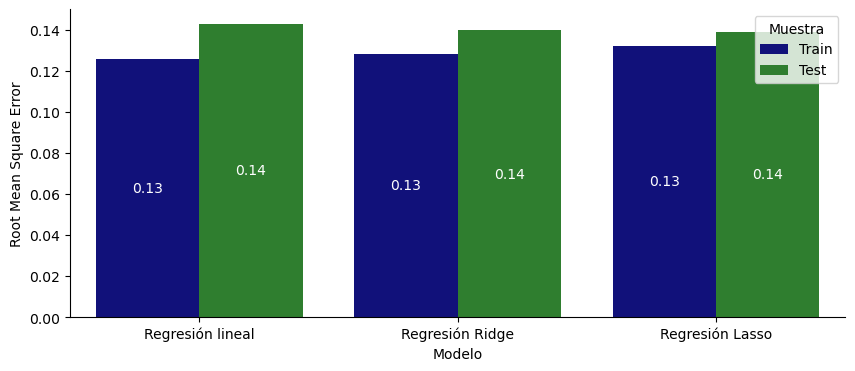

In [74]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'MAE')

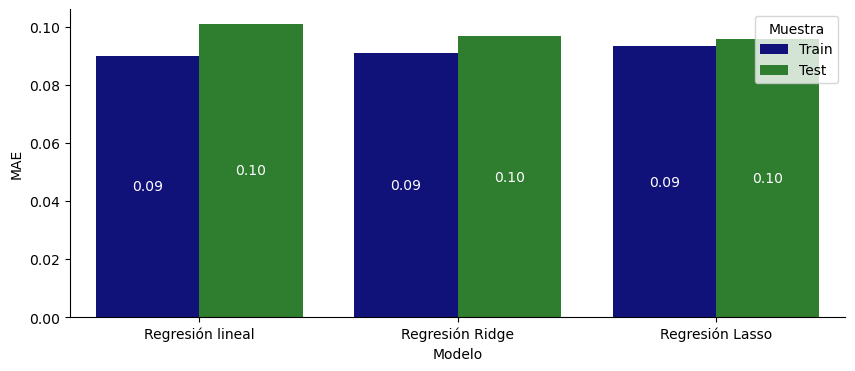

In [77]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "MAE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("MAE")

21. ¿Qué puede interpretar de los resultados?

In [76]:
resultados

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión lineal,Train,0.089931,8.785992e+11,0.125675
1,Regresión lineal,Test,0.100910,4.263053e+12,0.142951
0,Regresión Ridge,Train,0.090819,7.720923e+11,0.128334
1,Regresión Ridge,Test,0.096621,3.192154e+12,0.139763
0,Regresión Lasso,Train,0.093137,7.045650e+11,0.132352
1,Regresión Lasso,Test,0.095831,3.260901e+12,0.139113


22. Pruebe entrenando un KNN. Entrene un KNN y escoja el K Óptimo usando `grid search` y `cross validation`.

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(weights = "distance")
k_grid = {"n_neighbors": [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]}

In [79]:
neigh_cv = GridSearchCV(neigh, k_grid, scoring = "neg_root_mean_squared_error", cv = 5, return_train_score = True)
neigh_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(weights='distance'),
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29, 31]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [80]:
cv_results = pd.DataFrame(neigh_cv.cv_results_)

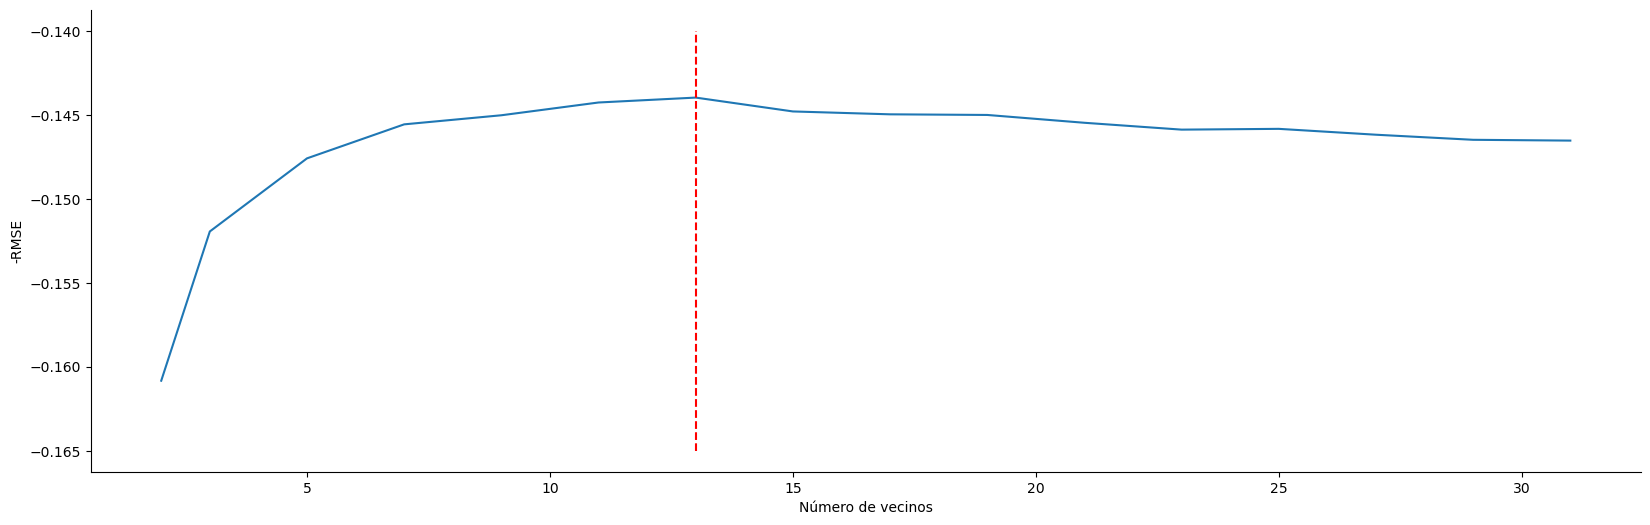

In [81]:
fig, ax = plt.subplots(figsize = (20, 6))
sns.despine()
sns.lineplot(data = cv_results, x = 'param_n_neighbors', y = 'mean_test_score', ax = ax)
ax.set_xlabel("Número de vecinos")
ax.set_ylabel("-RMSE")
plt.vlines(x = neigh_cv.best_params_["n_neighbors"], ymin = -0.165, ymax = -0.14, color = "red", linestyles = "dashed")

23. Evalue el modelo y compare con los otros resultados.

In [82]:
y_hat_in4 = neigh_cv.predict(X_train)
y_hat_out4 = neigh_cv.predict(X_test)

In [83]:
mae_in4 = mean_absolute_error(y_train, y_hat_in4) 
mape_in4 = mean_absolute_percentage_error(y_train, y_hat_in4) 
rmse_in4 = mean_squared_error(y_train, y_hat_in4, squared = False)
mae_out4 = mean_absolute_error(y_test, y_hat_out4) 
mape_out4 = mean_absolute_percentage_error(y_test, y_hat_out4) 
rmse_out4 = mean_squared_error(y_test, y_hat_out4, squared = False)  

In [84]:
resultados4 = pd.DataFrame({"Modelo": ["KNN", "KNN"],
                           "Muestra": ["Train", "Test"],
                           "MAE": [mae_in4, mae_out4],
                           "MAPE": [mape_in4, mape_out4],
                           "RMSE": [rmse_in4, rmse_out4]})
resultados4

,Modelo,Muestra,MAE,MAPE,RMSE
0,KNN,Train,0.000000,0.000000e+00,0.000000
1,KNN,Test,0.099499,4.586497e+12,0.146376


In [85]:
resultados = pd.concat([resultados, resultados4])
resultados

,Modelo,Muestra,MAE,MAPE,RMSE
0,Regresión lineal,Train,0.089931,8.785992e+11,0.125675
1,Regresión lineal,Test,0.100910,4.263053e+12,0.142951
0,Regresión Ridge,Train,0.090819,7.720923e+11,0.128334
1,Regresión Ridge,Test,0.096621,3.192154e+12,0.139763
0,Regresión Lasso,Train,0.093137,7.045650e+11,0.132352
1,Regresión Lasso,Test,0.095831,3.260901e+12,0.139113
0,KNN,Train,0.000000,0.000000e+00,0.000000
1,KNN,Test,0.099499,4.586497e+12,0.146376


Text(0, 0.5, 'Root Mean Square Error')

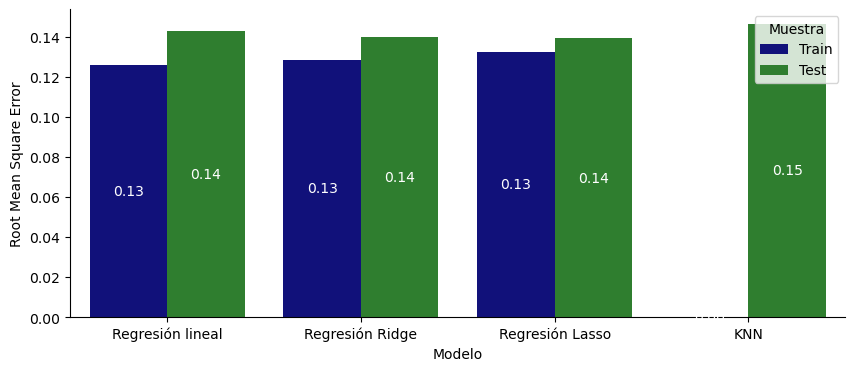

In [86]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.despine()
sns.barplot(data = resultados, x = "Modelo", y = "RMSE", hue = "Muestra", 
            palette = ["darkblue", "forestgreen"], ax = ax)
ax.bar_label(ax.containers[0], fmt = '%.2f', label_type = 'center', color = "white")
ax.bar_label(ax.containers[1], fmt = '%.2f', label_type = 'center', color = "white")
plt.xlabel("Modelo")
plt.ylabel("Root Mean Square Error")